# How to use Atom Stalker to find atoms and generate trajectories

This project started with the idea in mind to make atom identification and trajectory generation as flexible as possible. Hence it is using sliding windows and AdaBoost to efficiently find deciding features distinguishing available positive and negative samples.

Once the AdaBoost classifier is trained we can calculate atom positions in available frames and from this generate trajectories.

Note, there is no reason not to try out other classifiers as well. sklearn's api makes this very userfriendly.

## Generate Samples

In order to generate samples we here make use of kmeans clustering in a feature space. For each pixel we generate a feature vector containing the pixels intensity as well as the intensity differences with the neighboring pixels (here first shell, but you can change that). This leads to clusters where we choose the cluster with the highest average pixel intensity.

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


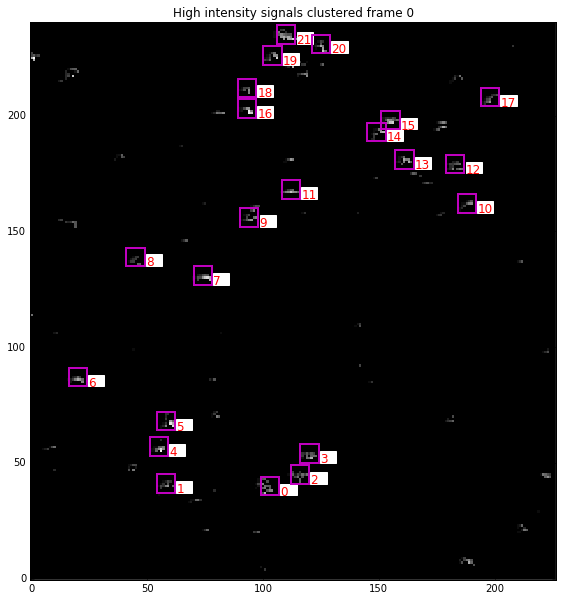


agglomeration: xys 0 centers 0, classifications 0
xys 22 centers 22 samples 22 classifications 22

Generating samples with the sliding window technique...
positive_centers (22L, 2L)
xys 328 centers 328 samples 328 classifications 328
sliding: xys 22 centers 22, classifications 22


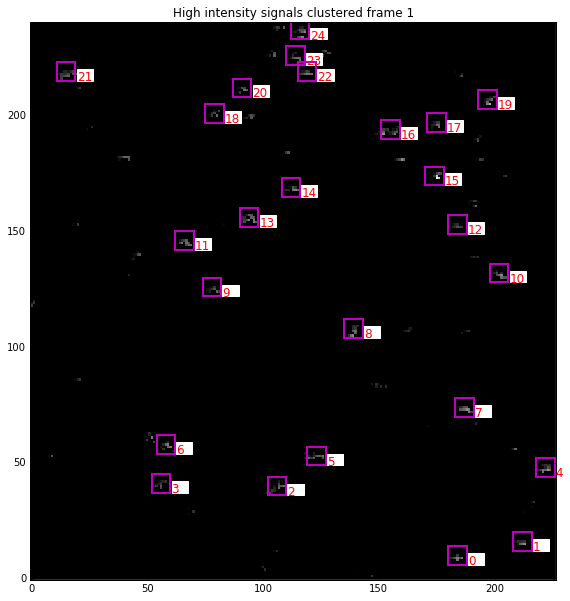


agglomeration: xys 0 centers 0, classifications 0
xys 25 centers 25 samples 25 classifications 25

Generating samples with the sliding window technique...
positive_centers (25L, 2L)
xys 315 centers 315 samples 315 classifications 315
sliding: xys 25 centers 25, classifications 25
image 0


D:\Anaconda\envs\python2vtk\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


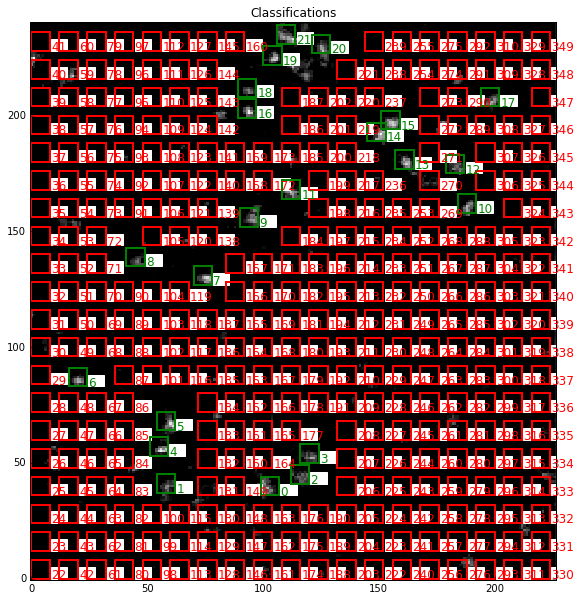

image 1


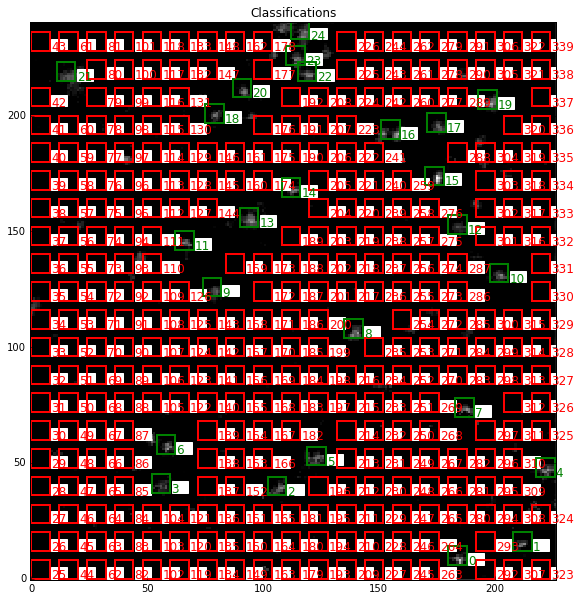

In [1]:
%reset
%matplotlib inline
from AtomStalker import load_TEM_image, TEM_sliding_collector

#path = './TEM_images/FEI_HAADF_Image_movie_282-CLEANED-subtracted.h5'#BackgroundSubtracted.h5'
path = "./example-subtracted.h5"
idx_frames = range(10)
xlim = [0,240]
ylim = [0,280]
width=8
height=8
xstep=12 #shift of pixels in x per iteration
ystep=12 #shift of pixels in y per iteration
padding=5
distance = 1
ix = 0
n_clusters = 4
n_frames_pca_km = 2
key = '/Experiments/__unnamed__/data' #old h5 file: 'dataset', new: '/Experiments/__unnamed__/data'

img_vec = [load_TEM_image(path,h5=True,frame=v,key=key) for v in idx_frames]
Tsc = TEM_sliding_collector()
Tsc.set_window_size(width=width,height=height)
Tsc.set_image(img_vec)

Tsc.create_samples(n_frames_pca_km,n_clusters,distance,xstep=xstep,ystep=ystep,max_iter=300,tol=1e-4,t=1,cluster_min_size=9)
Tsc.show_all_sliding_window_classifications()

## Manually correcting false classifications from kmeans

The sample generation suggests classes, see above where positive is green and negative is red. In case that suggestions are wrong please specify below in form of a list of lists. Each list corresponds to one frame with integer entries related to the numbers shown in the patches in the images above. The lists will be interpreted for each frame, hence if there are no changes to be made for a frame insert an empty list for that frame. 

Tip: If you have mistakenly assigned a class to a windows using the below cell just execute this cell again to flip the classification back to its original value.

image 0


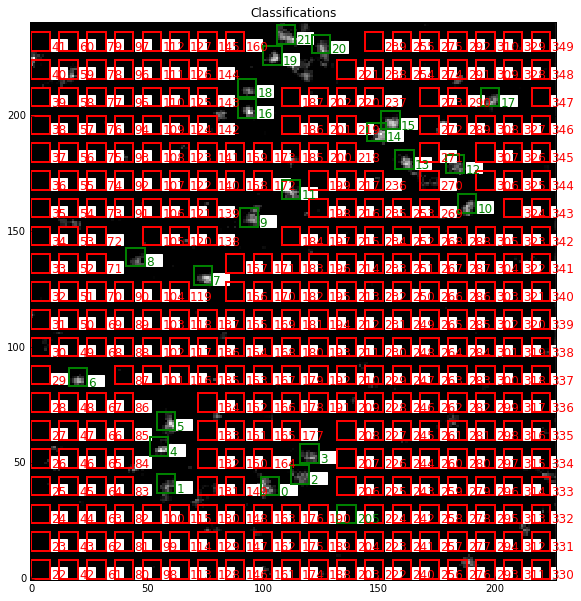

image 1


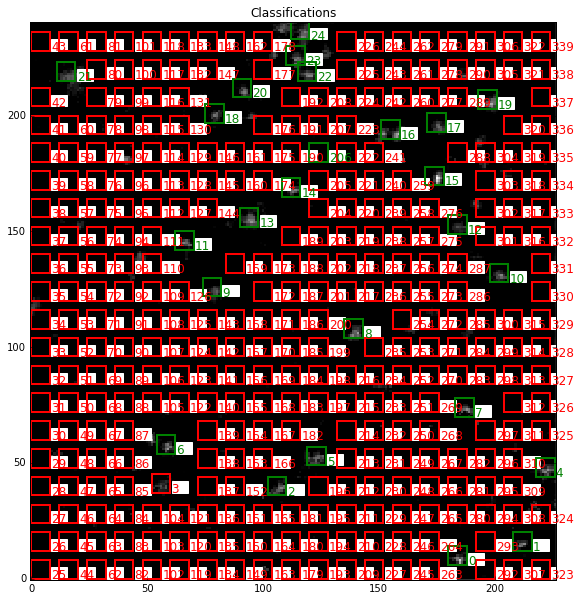

In [2]:
wrong_classifications = [[205],
                         [206,3]]
Tsc.set_classifications(wrong_classifications)
Tsc.show_all_sliding_window_classifications()

## Multiplying Samples

This is a neat little trick which allows a significant improvement in the classification. We "multiply" our samples by assuming that slight shifts of the samples generated previously doesn't change their classification. This essentially generates many more samples for free!

Created amount of samples:
424 positive samples
5552 negative samples
5976 number of samples in total
image 0


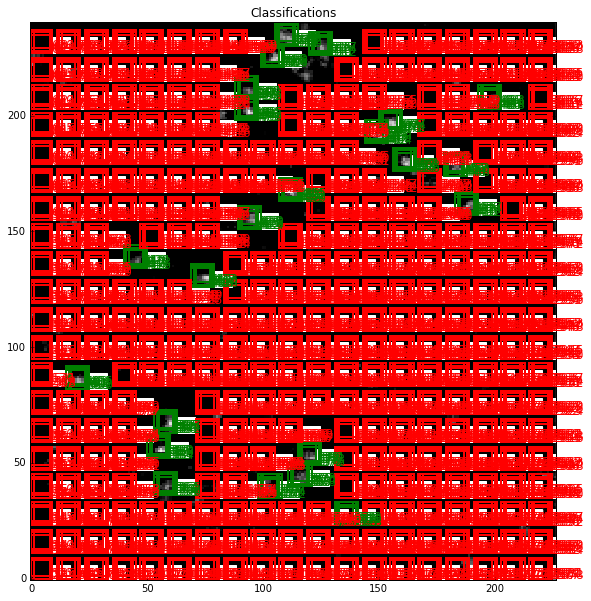

image 1


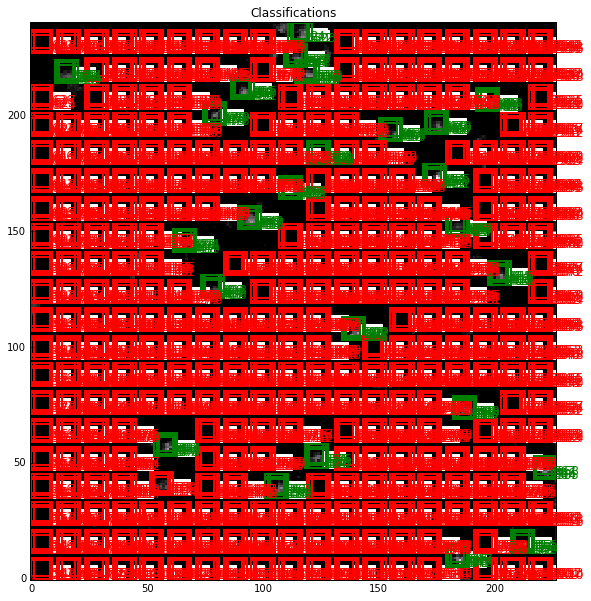

In [3]:
Tsc.multiply_all_samples(distance=1)
Tsc.show_all_sliding_window_classifications()

## Write samples and their classes to disk

For posterity

In [4]:
classes_save_path = "./classes_for_classifier_training.txt"
Tsc.save_sample_positions_and_class(classes_save_path)

Writing samples for classifier training to disk at ./classes_for_classifier_training.txt...


## Loading samples for the training of a classifier from disk

Loading samples for classifier training from disk at ./classes_for_classifier_training.txt...
image 0 frame 0


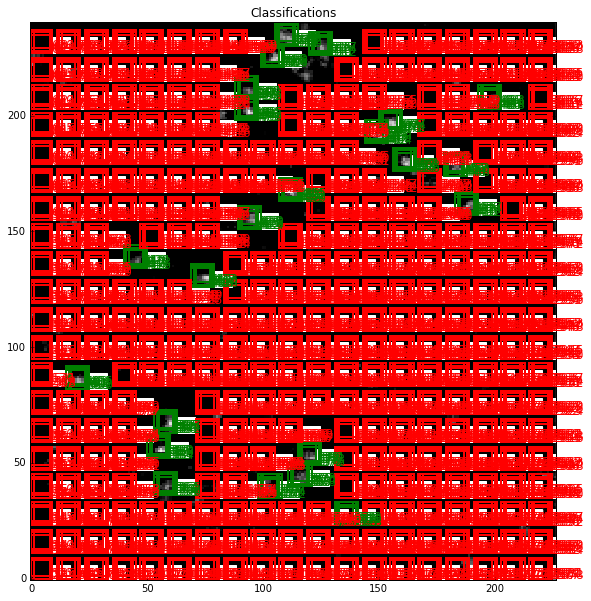

image 1 frame 1


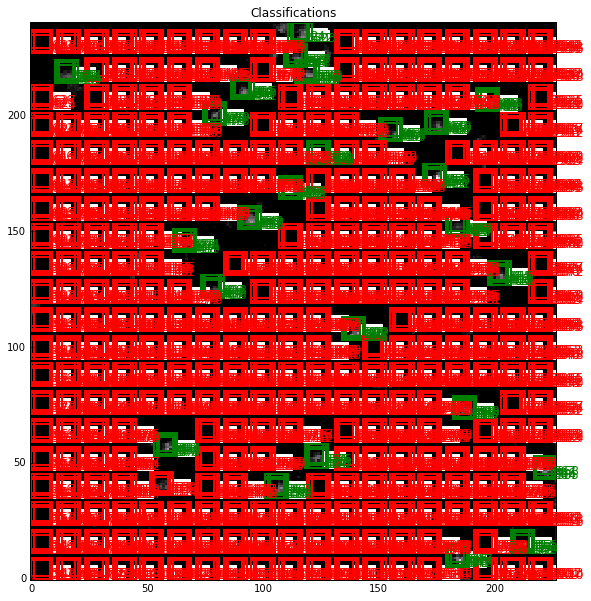

In [5]:
%matplotlib inline
from AtomStalker import load_TEM_image, TEM_sliding_collector

path = "./example-subtracted.h5"
xlim = [0,240]
ylim = [0,280]
width=8
height=8
padding=5
key = '/Experiments/__unnamed__/data'

img_vec = [load_TEM_image(path,h5=True,frame=v,key=key) for v in range(10)]
Tsc = TEM_sliding_collector()
Tsc.set_window_size(width=width,height=height)
Tsc.set_image(img_vec)
Tsc.get_sub_image_vec(xlim=xlim,ylim=ylim,padding=padding)

classes_save_path = "./classes_for_classifier_training.txt"
Tsc.load_sample_positions_and_class(classes_save_path)
Tsc.show_all_sliding_window_classifications(default_class=0,colors=['r','g','y','m'],frames=range(10))

## Generate the classifier

In [6]:
import sys
sys.path.append("D:/Anaconda/envs/python2/Lib/site-packages")
import pywt
print(pywt.wavelist())

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


As mentioned earlier we use here an AdaBoost classifier, but you can simply use another one if you so choose.

In [7]:
from AtomStalker import ClassificationTrainer
from sklearn.ensemble import AdaBoostClassifier

path_classifier = './classifier_test'

all_samples, all_classifications = Tsc.get_all_samples_and_classifications()
CT = ClassificationTrainer(wavelet='coif1')
CT.set_samples(all_samples)
CT.get_features()
ABC = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
CT.set_classifier_and_train(ABC,all_classifications)
CT.save_classifier2disk(path_classifier)

Getting samples...
Setting samples...
setting classifier and training...

Writing classifier to ./classifier_test...


Quality of classifier running on the training data.

In [8]:
new_classy = CT.get_predictions(all_samples)

tp = sum([v==1 for v,v2 in zip(all_classifications,new_classy) if v==v2])
tn = sum([v!=1 for v,v2 in zip(all_classifications,new_classy) if v==v2])
fn = sum([v!=1 for v,v2 in zip(all_classifications,new_classy) if v!=v2])
fp = sum([v==1 for v,v2 in zip(all_classifications,new_classy) if v!=v2])
R = tp/float(tp+fn)
P = tp/float(tp+fp)
F1 = 2*P*R/(P+R)

print("#{} positive classifications {} negative ones. tp {} fp {} tn {} fn {} F1 score = {}".format(sum(new_classy),len(new_classy)-sum(new_classy),tp,fp,tn,fn,F1))
print("all classy {} new classy {}".format(len(all_classifications),len(new_classy)))

#407.0 positive classifications 5569.0 negative ones. tp 406 fp 18 tn 5551 fn 1 F1 score = 0.977135980746
all classy 5976 new classy 5976


## Classification

Either directly via the ImagePeakClassifier class...


Processing TEM image sequence...

Processing frame 0...

Analyzing...
51480 frames
features (51480L, 43L)
1372 positive classifications in total

 30 clusters

Processing frame 1...

Analyzing...
51480 frames
features (51480L, 43L)
1398 positive classifications in total

 36 clusters

Processing frame 2...

Analyzing...
51480 frames
features (51480L, 43L)
1097 positive classifications in total

 32 clusters

Processing frame 3...

Analyzing...
51480 frames
features (51480L, 43L)
1356 positive classifications in total

 28 clusters

Processing frame 4...

Analyzing...
51480 frames
features (51480L, 43L)
1109 positive classifications in total

 31 clusters

memory usage
var classifier: [56, 56, 56, 56, 56]
var img: [437768, 437768, 437768, 437768, 437768]
var win_width: [24, 24, 24, 24, 24]
var win_height: [24, 24, 24, 24, 24]
var samples: [26403272, 26403272, 26403272, 26403272, 26403272]
var xys: [4581368, 4581368, 4581368, 4581368, 4581368]
var classifications: [411936, 411936, 41193

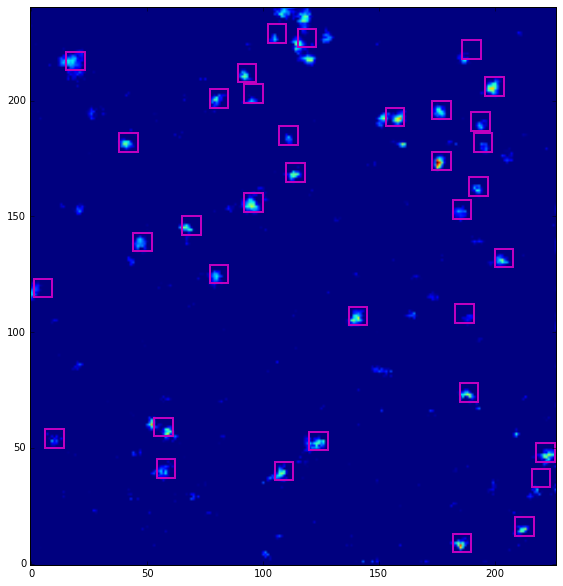

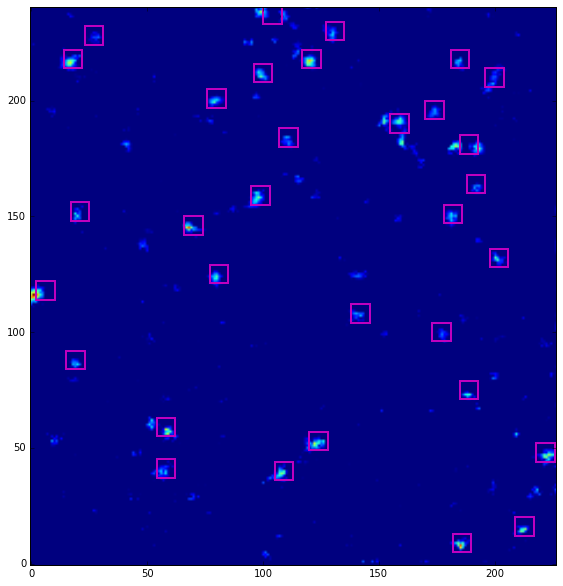

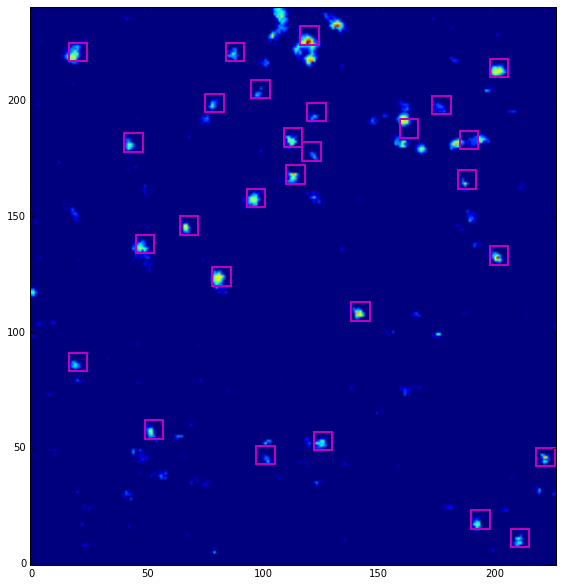

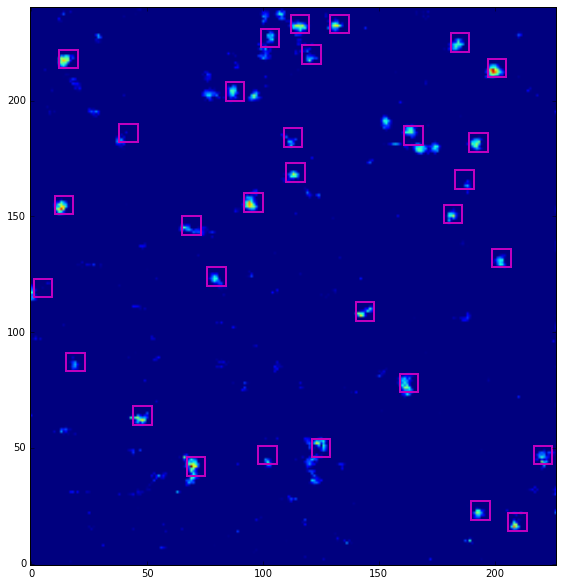

In [9]:
from AtomStalker import ImagePeakClassifier

path = "./example-subtracted.h5"
path_save_coordinates = 'coordinates.txt'
path_classifier = './classifier_test'
t = 5 #maximum spatial distance of found window centers to be clustered - if two atoms are identified as one this value could be to large
xstep = 1
ystep = 1
num_frames = 5

width=8
height=8

Ipc = ImagePeakClassifier(wavelet='coif1')

#set classifier
classy = Ipc.load_classifier(path_classifier)
#Ipc.set_trained_classifier(CT.classifier)

#process data
Ipc.process_TEM_sequence(path,width,height,xstep=xstep,ystep=ystep,iclassy=[1],t=t,num_frames=num_frames,key='/Experiments/__unnamed__/data')
#save coordinates
Ipc.save_ClusterCenters2disk(path_save_coordinates,separator=' ')

#for i in range(num_frames):
#    Ipc.show_window_for_single_img(i)
Ipc.show_window_for_single_img(1)
Ipc.show_window_for_single_img(2)
Ipc.show_window_for_single_img(3)
Ipc.show_window_for_single_img(4)
#tr.print_diff()

... or via the wrapping function Process_TEM.

In [2]:
from AtomStalker import ImagePeakClassifier, Process_TEM
path = "./example-subtracted.h5"
path_save_coordinates = 'coordinates.txt'
path_classifier = './classifier_test'
t = 5 #maximum spatial distance of found window centers to be clustered - if two atoms are identified as one this value could be to large
xstep = 1
ystep = 1
num_frames = 5

width=8
height=8

centers, corners = Process_TEM(path,path_classifier,width,height,xstep=xstep,ystep=ystep,t=t,num_frames=num_frames,key='/Experiments/__unnamed__/data',
                write_path=path_save_coordinates,bool_return=True,wavelet='coif1')



Processing frame 0...

Analyzing...
51480 frames
features (51480L, 43L)
1372 positive classifications in total

 30 clusters

Processing frame 1...

Analyzing...
51480 frames
features (51480L, 43L)
1398 positive classifications in total

 36 clusters

Processing frame 2...

Analyzing...
51480 frames
features (51480L, 43L)
1097 positive classifications in total

 32 clusters

Processing frame 3...

Analyzing...
51480 frames
features (51480L, 43L)
1356 positive classifications in total

 28 clusters

Processing frame 4...

Analyzing...
51480 frames
features (51480L, 43L)
1109 positive classifications in total

 31 clusters

Writing cluster centers to disk coordinates.txt...


AtomStalker\Classification.py:209: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if c==None:


In [1]:
%matplotlib inline
from AtomStalker import load_coordinates

#reading real positions for inference
path = "./example_coordinates.txt"
loaded_positions = load_coordinates(path)
loaded_intensities = [[1]*pos.shape[1] for pos in loaded_positions] #faking some intensities (just for the IO - not actually included in the sigmoid)

loaded 282 frames


Let's connect the dots...

D:\Anaconda\envs\python2vtk\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


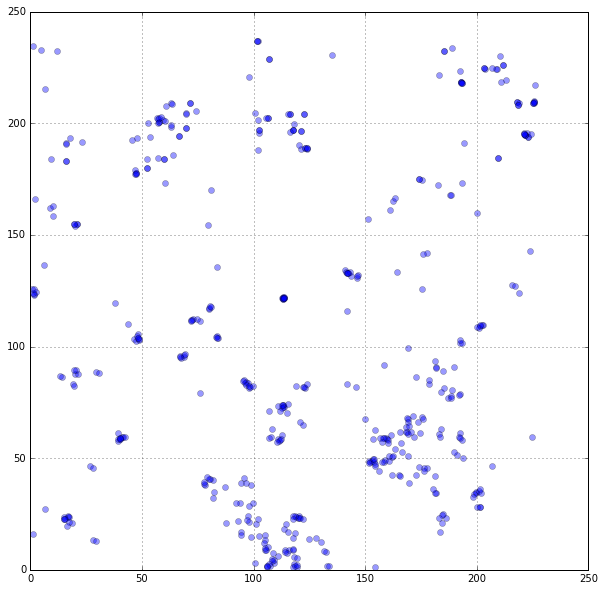

In [2]:
%matplotlib inline
from AtomStalker import show_trajectories
show_trajectories(loaded_positions,None,None,show_tuple=False,t_lim=(0,10))

## Tracking

For the tracking we require a sigmoid, explanation below. Here is the place where we create it.

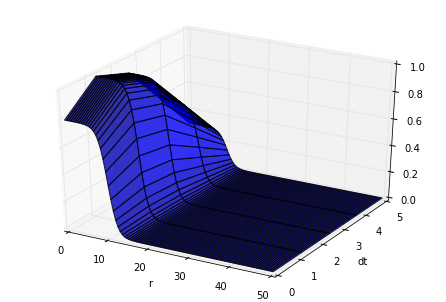

In [3]:
from AtomStalker import SigmoidConstructor
import numpy as np

space = {'r':np.linspace(0,50,100),'dt':np.linspace(0,5,5)} #ranges for the variables included into the sigmoid
SC = SigmoidConstructor(space)
SC.create()
SC.show_sigmoid()
splined_sigmoid = SC.get_splined_sigmoid()

# Linking

Given two observed atoms we can calculate their differences as $\vec{x}$, in our case $\vec{x} = (r,\theta,\Delta I,...)^T$. Using $\vec{x}$ we want to decide whether those two atoms form a link or not. This is equivalent to the classification of $\vec{x}$ into either $\mathcal{C=+}$ for "yes they form a link" or $\mathcal{C=-}$  otherwise. The idea then is to either use user input in manually specifying links from which the two classes are generated or to give an initial assumption about the distribution of those classes. Every so often these classes are then updated to adjust better to the actual observations made.

This is based on the *logistic sigmoid* function $\sigma(a) = \frac{1}{1+\exp{(-a)}}$ with $a=\ln\frac{p(\vec{x}|C=+)p(C=+)}{p(\vec{x}|C=-)p(C=-)}$. Hence if $p(\vec{x}|C=+) = p(\vec{x}|C=-)$ then $\sigma = 1/2$. If $C=+$ is more likely then $\sigma > 1/2$ and vice versa.

Practically this means one creates a histogram for both classes containing all available info and then plug them both into the logistic sigmoid and fit all sorts of things, splines (currently), Gaussian Processes, ...

## Linking strategies
Given an atom at time $i$ and "neighboring" atoms at time $i+1$ there could be multiple $\vec{x}$ which are classified as $\mathcal{C=+}$. There we use different strategies to link, three linking strategies are implemented:

* greedy,
* $\varepsilon$-greedy and
* softmax.

### Greedy Strategy

The greedy strategy choses always the link with maximum sigmoid value.

In [4]:
from AtomStalker import link_positions

dt = 5
t_max = 25
t_update = 5

LM_traj_greedy, link_values_greedy = link_positions(loaded_positions,loaded_intensities,splined_sigmoid,dt=dt,t_update=t_update,t_max=t_max,
               link_type='greedy',link_paras=None,final_eval=True)


t 0
calc sigmoids and combinations 0.298000097275s...
update pos 0.0s...
updating targets 0.0130000114441s...
splitting targets 0.000999927520752s...
linking time 0.31200003624s...

t 1
calc sigmoids and combinations 0.298000097275s...
update pos 0.00399994850159s...
updating targets 0.007000207901s...
splitting targets 0.000999927520752s...
finding fixed 0.0s...
to_solidify 0.00100016593933s...
possible new links 0.0s...
possible new links 0.0019998550415s...
linking time 0.319999933243s...

t 2
calc sigmoids and combinations 0.152000188828s...
update pos 0.000999927520752s...
updating targets 0.00999999046326s...
splitting targets 0.0s...
finding fixed 0.000999927520752s...
to_solidify 0.000999927520752s...
possible new links 0.0s...
possible new links 0.00200009346008s...
linking time 0.176000118256s...

t 3


AtomStalker\TrajectoryLinker.py:1168: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.positions != None:
AtomStalker\TrajectoryLinker.py:1173: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.intensities != None:


calc sigmoids and combinations 0.171999931335s...
update pos 0.0s...
updating targets 0.00399994850159s...
splitting targets 0.000999927520752s...
finding fixed 0.0s...
to_solidify 0.000999927520752s...
possible new links 0.0s...
possible new links 0.00200009346008s...
linking time 0.198999881744s...

t 4
calc sigmoids and combinations 0.144000053406s...
update pos 0.0s...
updating targets 0.00400018692017s...
splitting targets 0.000999927520752s...
finding fixed 0.0s...
to_solidify 0.0019998550415s...
possible new links 0.0s...
possible new links 0.0019998550415s...
linking time 0.175000190735s...

t 5
calc sigmoids and combinations 0.232000112534s...
update pos 0.0019998550415s...
updating targets 0.00399994850159s...
splitting targets 0.0s...
finding fixed 0.0s...
to_solidify 0.000999927520752s...
possible new links 0.000999927520752s...
possible new links 0.00399994850159s...
linking time 0.271000146866s...


AtomStalker\TrajectoryLinker.py:1088: RuntimeWarning: divide by zero encountered in log
  a = np.log(pd_pos) - np.log(pd_neg)
AtomStalker\TrajectoryLinker.py:1088: RuntimeWarning: invalid value encountered in subtract
  a = np.log(pd_pos) - np.log(pd_neg)



t 6
calc sigmoids and combinations 0.159999847412s...
update pos 0.00100016593933s...
updating targets 0.00399994850159s...
splitting targets 0.000999927520752s...
finding fixed 0.00100016593933s...
to_solidify 0.0019998550415s...
possible new links 0.0s...
possible new links 0.00200009346008s...
linking time 0.197999954224s...

t 7
calc sigmoids and combinations 0.141999959946s...
update pos 0.0s...
updating targets 0.00399994850159s...
splitting targets 0.0s...
finding fixed 0.000999927520752s...
to_solidify 0.000999927520752s...
possible new links 0.0s...
possible new links 0.00200009346008s...
linking time 0.180999994278s...

t 8
calc sigmoids and combinations 0.15700006485s...
update pos 0.000999927520752s...
updating targets 0.00499987602234s...
splitting targets 0.0s...
finding fixed 0.000999927520752s...
to_solidify 0.00200009346008s...
possible new links 0.0s...
possible new links 0.00200009346008s...
linking time 0.210999965668s...

t 9
calc sigmoids and combinations 0.24500

## $\varepsilon$-Greedy Strategy

The $\varepsilon$-greedy strategy is a modification of the the greedy strategy. An issue of the greedy strategy is that always chosing the link with the maximum sigmoid value between two atoms may not lead to the most likely trajectory when multiple trajectories are present. Hence one choses a $\varepsilon \in ]0,1[$. For every linking then there is the probability of $\varepsilon$ to chose a link completely at random without regard for the assigned sigmoid value.

In [5]:
dt = 5
t_max = 25
t_update = 5

#greedy
LM_traj_epsgreedy, link_values_epsgreedy = link_positions(loaded_positions,loaded_intensities,splined_sigmoid,dt=dt,t_update=t_update,t_max=t_max,
               link_type='eps-greedy',link_paras={'eps':.2},final_eval=True)


t 0
calc sigmoids and combinations 0.302999973297s...
update pos 0.0s...
updating targets 0.00699996948242s...
splitting targets 0.0s...
linking time 0.311999797821s...

t 1
calc sigmoids and combinations 0.146000146866s...
update pos 0.0s...
updating targets 0.00600004196167s...
splitting targets 0.0s...
finding fixed 0.0s...
to_solidify 0.0s...
possible new links 0.000999927520752s...
possible new links 0.00200009346008s...
linking time 0.15900015831s...

t 2
calc sigmoids and combinations 0.197999954224s...
update pos 0.000999927520752s...
updating targets 0.00399994850159s...
splitting targets 0.0s...
finding fixed 0.0s...
to_solidify 0.00100016593933s...
possible new links 0.0s...
possible new links 0.00299978256226s...
linking time 0.21799993515s...

t 3
calc sigmoids and combinations 0.131999969482s...
update pos 0.0s...
updating targets 0.00399994850159s...
splitting targets 0.00100016593933s...
finding fixed 0.0s...
to_solidify 0.00100016593933s...
possible new links 0.0s...


## Softmax Strategy

The softmax strategy is a modification of the $\varepsilon$-greedy strategy. In the softmax strategy we assign a probability to each link available for a given position. This is done by taking the sigmoid values we obtained $\sigma$. For this the Boltzmann distribution is used 
$$ P(\sigma_k) = \frac{e^{-\frac{\sigma_k}{\tau}}}{\sum_{k^\prime}e^{-\frac{\sigma_{k^\prime}}{\tau}}} $$
yielding the probability for an atom and its possible link $k$ with corresponding $\sigma$ value.

In [6]:
dt = 5
t_max = 25
t_update = 5

#greedy
LM_traj_softmax, link_values_softmax = link_positions(loaded_positions,loaded_intensities,splined_sigmoid,dt=dt,t_update=t_update,t_max=t_max,
               link_type='softmax',link_paras={'tau':1.},final_eval=True)


t 0
calc sigmoids and combinations 0.242999792099s...
update pos 0.0s...
updating targets 0.00499987602234s...
splitting targets 0.0s...
linking time 0.25s...

t 1
calc sigmoids and combinations 0.171999931335s...
update pos 0.0s...
updating targets 0.00499987602234s...
splitting targets 0.0s...
finding fixed 0.0s...
to_solidify 0.0s...
possible new links 0.0s...
possible new links 0.00999999046326s...
linking time 0.191999912262s...

t 2
calc sigmoids and combinations 0.25200009346s...
update pos 0.0s...
updating targets 0.00499987602234s...
splitting targets 0.0s...
finding fixed 0.0s...
to_solidify 0.00100016593933s...
possible new links 0.0s...
possible new links 0.0199999809265s...
linking time 0.289999961853s...

t 3
calc sigmoids and combinations 0.157999992371s...
update pos 0.00100016593933s...
updating targets 0.010999917984s...
splitting targets 0.0s...
finding fixed 0.0s...
to_solidify 0.000999927520752s...
possible new links 0.0s...
possible new links 0.0170001983643s...


Some comparative analysis. Which star constellations do you see?

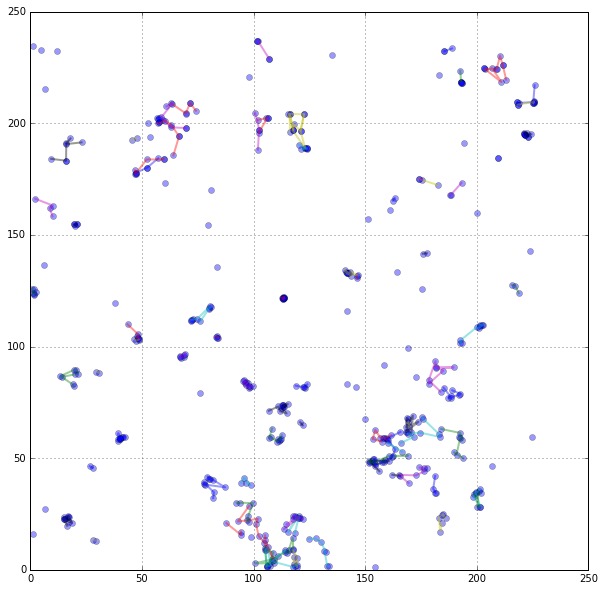

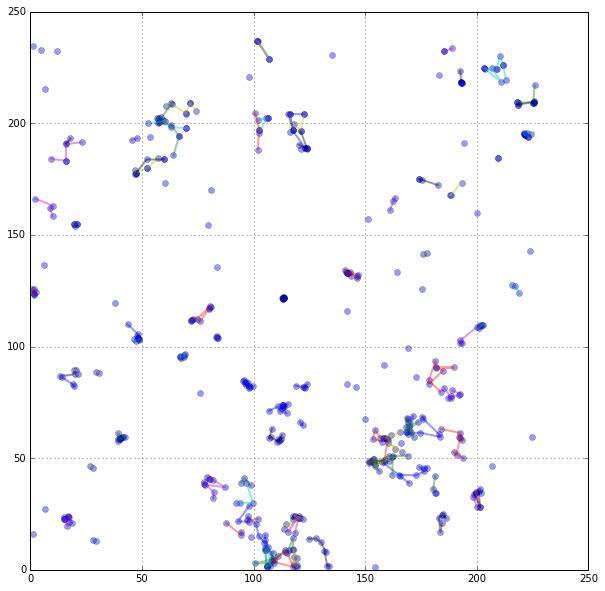

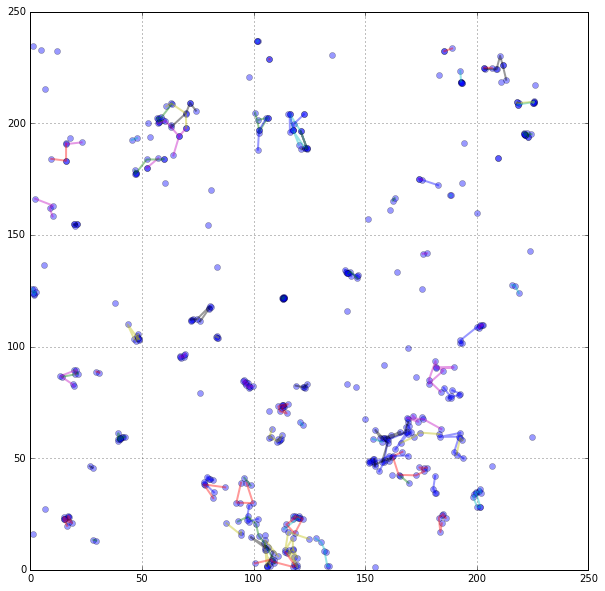

softmax: q [39.708423432083237, 46.865652159269146, 44.010580760531354, 39.591210164334711, 37.716582617946884, 36.565280380059917, 13.944210410982647, 12.504253122568079, 18.278360858327215, 15.714640476965215, 13.261367332310712, 13.340838408212791, 12.100511613383331, 12.371122572198306, 11.164197621386901, 14.686857394241478, 12.58478526282539, 17.712962435168034, 15.971357362724438, 17.571515772128272, 17.169300849661617, 16.67067932101908, 12.857327512187037, 10.692531913993179, 0],
t [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
greedy: q [43.04989249299507, 46.979138142433676, 45.447165634765227, 39.742475482935134, 39.535322760907597, 38.807450809669426, 15.770657386829392, 13.576445337973579, 19.52824485587524, 16.706623533396147, 15.103136973620265, 12.497404791746769, 9.3805888828560704, 11.320051316543413, 13.115652175322012, 13.955223445970503, 17.883505437844075, 19.421034722574692, 15.383186834850425, 18.446612684566894, 15.4

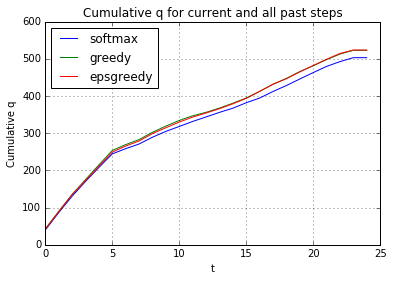

In [8]:
from AtomStalker import show_trajectories,show_values_vs_t

#trajectories
show_trajectories(loaded_positions,LM_traj_greedy,None,show_tuple=False,t_lim=(0,10),title='Greedy',legend=False)
show_trajectories(loaded_positions,LM_traj_epsgreedy,None,show_tuple=False,t_lim=(0,10),title='$\varepsilon$-$Greedy',legend=False)
show_trajectories(loaded_positions,LM_traj_softmax,None,show_tuple=False,t_lim=(0,10),title='Softmax',legend=False)

#q vs t
show_values_vs_t(greedy=link_values_greedy,epsgreedy=link_values_epsgreedy,softmax=link_values_softmax)

## Writing trajectories to disk

In [9]:
from AtomStalker import write_trajectories
path = "./result.traj"
write_trajectories(path,LM_traj_greedy,loaded_positions,loaded_intensities)